In [1]:
import re 
%matplotlib inline 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

import nltk
from nltk import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [2]:
#Data Preprocessing and Transformation
df3 = pd.read_csv('reviews_500.csv')


In [3]:
df2 = pd.DataFrame(df3,columns = ['rating','text'])
df2.rename(columns = {'rating':'Rating','text':'Review'},inplace = True)

In [4]:
def apply_sentiment(Rating):
    if(Rating <=2 ):
        return 0
    else:
        return 1

In [5]:
df2['Sentiment'] = df2['Rating'].apply(apply_sentiment)
df2.drop(['Rating'],axis = 1, inplace = True)

In [6]:
sentiment = df2['Sentiment'].value_counts()
sentiment

1    349
0    151
Name: Sentiment, dtype: int64

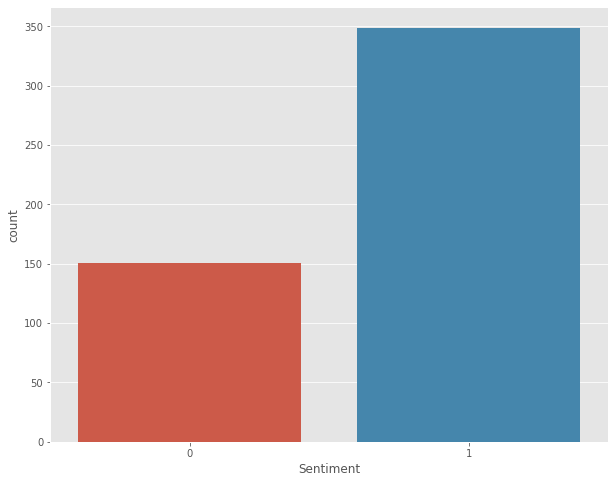

In [7]:
plt.figure(figsize = ( 10,8))
sns.countplot(data = df2, x = 'Sentiment')
plt.show()

In [8]:
def clean_text(Review):
   
    Review = str(Review).lower() # convert to lowercase
    Review = re.sub('\[.*?\]', '', Review) 
    Review = re.sub('https?://\S+|www\.\S+', '', Review) # Remove URls
    Review = re.sub('<.*?>+', '', Review)
    Review = re.sub(r'[^a-z0-9\s]', '', Review) # Remove punctuation
    Review = re.sub('\n', '', Review)
    Review = re.sub('\w*\d\w*', '', Review)
    return Review

In [9]:
df2['Review']

0      \n  Battery Issue.... Phone is Heating during ...
1      \n  Facing heating issue while using camera ap...
2      \n  My first time buying a OnePlus phone and I...
3      \n  HiPlease consider this message with a seri...
4      \n  Within 10 minutes of usage. It’s felt like...
                             ...                        
495    \n  Amazon Has selling Duplicate And Damaged o...
496    \n  1st day review..The battery got charged in...
497    \n  Ear phones could have been provided by One...
498    \n  Face recognition sometimes works even when...
499    \n  It's a good choice for a casual mobile use...
Name: Review, Length: 500, dtype: object

In [10]:
df2['Review'] = df2['Review'].apply(clean_text)

In [11]:
df2.head()

,Review,Sentiment
0,battery issue phone is heating during chargi...,0
1,facing heating issue while using camera app ...,0
2,my first time buying a oneplus phone and i r...,1
3,hiplease consider this message with a seriou...,0
4,within minutes of usage its felt like over ...,0


In [12]:
from nltk.corpus import stopwords
import nltk

stop_words = set(stopwords.words('english'))
stopword = []
sentence = df2['Review'][0]


#words = nltk.word_tokenize(sentence)


def remove_stopword(stop_words, sentence):
    return [word for word in nltk.word_tokenize(sentence) if word not in stop_words]

df2['reviews_text'] = df2['Review'].apply(lambda row: remove_stopword(stop_words, row))

## need to convert list into string
df2['reviews_text'] = df2['reviews_text'].apply(lambda row: ','.join(row))

In [13]:
df2.head(10)

,Review,Sentiment,reviews_text
0,battery issue phone is heating during chargi...,0,"battery,issue,phone,heating,charging,running,a..."
1,facing heating issue while using camera app ...,0,"facing,heating,issue,using,camera,app,general,..."
2,my first time buying a oneplus phone and i r...,1,"first,time,buying,oneplus,phone,really,like,fi..."
3,hiplease consider this message with a seriou...,0,"hiplease,consider,message,serious,note,one,plu..."
4,within minutes of usage its felt like over ...,0,"within,minutes,usage,felt,like,heat,cant,exper..."
5,i dont why no reviewer is speaking about it ...,0,"dont,reviewer,speaking,heating,normal,usage"
6,iam oneplus user since years i exchange my ...,0,"iam,oneplus,user,since,years,exchange,one,plus..."
7,after days of usage writing this best came...,1,"days,usage,writing,best,camera,quality,snapdra..."
8,writing after days of heating issues you w...,1,"writing,days,heating,issues,start,noticing,fir..."
9,i am writing down this after using for a cou...,1,"writing,using,couple,days,got,carbon,black,one..."


In [14]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
    ])

In [15]:
X = df2['reviews_text']
y = df2['Sentiment']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42,
                                                   test_size = 0.20)
X_train.shape,X_test.shape,y_train.shape

((400,), (100,), (400,))

In [17]:
fit_model = clf.fit(X_train,y_train)

In [18]:
y_pred = clf.predict(X_test)

In [19]:
print('Training accuracy:', fit_model.score(X_train,y_train))
print('Test accuracy:', fit_model.score(X_test,y_test))

Training accuracy: 0.7675
Test accuracy: 0.68


In [20]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.68      1.00      0.81        68

    accuracy                           0.68       100
   macro avg       0.34      0.50      0.40       100
weighted avg       0.46      0.68      0.55       100

[[ 0 32]
 [ 0 68]]


In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
from collections import Counter

In [23]:
print(sorted(Counter(df2['Sentiment']).items()))

[(0, 151), (1, 349)]


In [24]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.svm import SVC
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', SVC()),
    ])

In [25]:
X = df2['reviews_text']
y = df2['Sentiment']

In [26]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer    
cv = CountVectorizer(max_features=250)

In [27]:
X = cv.fit_transform(df2['reviews_text']).toarray()

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42,
                                                   test_size = 0.20)
X_train.shape,X_test.shape,y_train.shape

((400, 250), (100, 250), (400,))

Support vector machine

In [29]:
svm = SVC(kernel='linear',C=0.025,random_state=101)

In [30]:
fit_model_1 = svm.fit(X_train,y_train)

In [31]:
y_pred = svm.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,roc_curve,f1_score
print('Accuracy score    :',  round(accuracy_score(y_test,y_pred),4))
print('Precision score   :',  round(precision_score(y_test,y_pred),4))
print('Recall score      :',  round(recall_score(y_test,y_pred),4))
print('Confusion Matrix  :\n',confusion_matrix(y_test,y_pred))
print('F1_score          :',  round(f1_score(y_test,y_pred),4))

Accuracy score    : 0.78
Precision score   : 0.7614
Recall score      : 0.9853
Confusion Matrix  :
 [[11 21]
 [ 1 67]]
F1_score          : 0.859


Performence of Randomforest classifier

In [33]:
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier

In [34]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
y_pred_rf = rf_classifier.predict(X_test)

print('Accuracy score    :',  round(accuracy_score(y_test,y_pred_rf),4))
print('Precision score   :',  round(precision_score(y_test,y_pred_rf),4))
print('Recall score      :',  round(recall_score(y_test,y_pred_rf),4))
print('Confusion Matrix  :\n',confusion_matrix(y_test,y_pred_rf))
print('F1_score          :',  round(f1_score(y_test,y_pred_rf),4))

Accuracy score    : 0.81
Precision score   : 0.8025
Recall score      : 0.9559
Confusion Matrix  :
 [[16 16]
 [ 3 65]]
F1_score          : 0.8725


Performence of AdaBoost classifier

In [36]:
adb_classifier = AdaBoostClassifier()
adb_classifier.fit(X_train,y_train)

AdaBoostClassifier()

In [37]:
y_pred_adb = adb_classifier.predict(X_test)

print('Accuracy score    :',  round(accuracy_score(y_test,y_pred_adb),4))
print('Precision score   :',  round(precision_score(y_test,y_pred_adb),4))
print('Recall score      :',  round(recall_score(y_test,y_pred_adb),4))
print('Confusion Matrix  :\n',confusion_matrix(y_test,y_pred_adb))
print('F1_score          :',  round(f1_score(y_test,y_pred_adb),4))

Accuracy score    : 0.72
Precision score   : 0.803
Recall score      : 0.7794
Confusion Matrix  :
 [[19 13]
 [15 53]]
F1_score          : 0.791


Performence of XG Boost

In [38]:
import xgboost as xgb 

In [39]:
train_x_y = xgb.DMatrix(data = X_train,label=y_train)

In [40]:
parameters={'max_depth':10, 
            'objective':'binary:logistic',
            'eval_metric':'auc',
            'learning_rate':.05,
            }

In [41]:
xgb_classifier = xgb.train(params = parameters,dtrain =train_x_y )

In [42]:
dtest=xgb.DMatrix(X_test)
y_pred_xgb = xgb_classifier.predict(dtest) 
y_pred_xgb

array([0.5005844 , 0.5845475 , 0.6128666 , 0.5009282 , 0.33745867,
       0.6520391 , 0.67375726, 0.6864779 , 0.33745867, 0.5686105 ,
       0.6231202 , 0.6864779 , 0.5613337 , 0.33745867, 0.6864779 ,
       0.33745867, 0.36079   , 0.6864779 , 0.6864779 , 0.5254941 ,
       0.6631785 , 0.60154945, 0.66645205, 0.65797466, 0.6521794 ,
       0.5254941 , 0.64808756, 0.539647  , 0.6864779 , 0.65081304,
       0.5254941 , 0.5707431 , 0.56705976, 0.49679688, 0.65797466,
       0.67375726, 0.52596915, 0.6864779 , 0.6177406 , 0.5254941 ,
       0.619408  , 0.40116447, 0.65797466, 0.5992032 , 0.48637366,
       0.526953  , 0.5990992 , 0.33745867, 0.47595456, 0.6313271 ,
       0.6631785 , 0.48026982, 0.5240256 , 0.6520391 , 0.6864779 ,
       0.6864779 , 0.66094446, 0.5254941 , 0.6864779 , 0.64883924,
       0.65797466, 0.60154945, 0.65710276, 0.539647  , 0.60074717,
       0.33745867, 0.6864779 , 0.33745867, 0.60074717, 0.5562084 ,
       0.36079   , 0.53328174, 0.6864779 , 0.33745867, 0.55837

In [43]:
#Converting probabilities into 1 or 0  
for i in range(0, X_test.shape[0]): 
    if y_pred_xgb[i]>=.5:       # setting threshold to .5 
       y_pred_xgb[i]=1 
    else: 
       y_pred_xgb[i]=0 

In [44]:
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score

Accuracy with XGBoost=  0.77
AUC score with XGBoost is:  0.7573099415204679
F1_score          : 0.8456
Precision score   : 0.7778
Recall score      : 0.9265


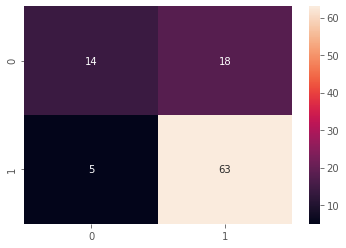

In [45]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True)

print ("Accuracy with XGBoost= ", accuracy_score(y_pred_xgb, y_test))
print("AUC score with XGBoost is: ", roc_auc_score(y_pred_xgb, y_test))
print('F1_score          :',  round(f1_score(y_test,y_pred_xgb),4))
print('Precision score   :',  round(precision_score(y_test,y_pred_xgb),4))
print('Recall score      :',  round(recall_score(y_test,y_pred_xgb),4)) 

Gradient Boosting Algorithm

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier()

In [47]:
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier()

In [48]:
y_pred = gb_classifier.predict(X_test)

Accuracy with GBBoost=  0.76
AUC score with GBBoost is:  0.6663602941176471
F1_score          : 0.84
Precision score   : 0.7683
Recall score      : 0.9265


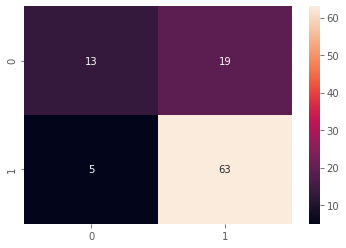

In [49]:
cm_xgb = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_xgb, annot=True)

print ("Accuracy with GBBoost= ", accuracy_score(y_test, y_pred))
print("AUC score with GBBoost is: ", roc_auc_score(y_test, y_pred))
print('F1_score          :',  round(f1_score(y_test,y_pred),4))
print('Precision score   :',  round(precision_score(y_test,y_pred),4))
print('Recall score      :',  round(recall_score(y_test,y_pred),4))

Support vector machine

In [50]:
svm = SVC(kernel='linear',C=0.025,random_state=101)

In [51]:
fit_model_1 = svm.fit(X_train,y_train)

In [52]:
y_pred = svm.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,roc_curve,f1_score
print('Accuracy score    :',  round(accuracy_score(y_test,y_pred),4))
print('Precision score   :',  round(precision_score(y_test,y_pred),4))
print('Recall score      :',  round(recall_score(y_test,y_pred),4))
print('Confusion Matrix  :\n',confusion_matrix(y_test,y_pred))
print('F1_score          :',  round(f1_score(y_test,y_pred),4))

Accuracy score    : 0.78
Precision score   : 0.7614
Recall score      : 0.9853
Confusion Matrix  :
 [[11 21]
 [ 1 67]]
F1_score          : 0.859


Performence of dt with depth= 4

In [54]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=4,class_weight={0:3,1:1})
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 3, 1: 1}, max_depth=4)

In [55]:
y_pred_dt = dt_model.predict(X_test)

print('Accuracy score    :',  round(accuracy_score(y_test,y_pred_dt),4))
print('Precision score   :',  round(precision_score(y_test,y_pred_dt),4))
print('Recall score      :',  round(recall_score(y_test,y_pred_dt),4))
print('Confusion Matrix  :\n',confusion_matrix(y_test,y_pred_dt))
print('F1_score          :',  round(f1_score(y_test,y_pred_dt),4))

Accuracy score    : 0.62
Precision score   : 0.8
Recall score      : 0.5882
Confusion Matrix  :
 [[22 10]
 [28 40]]
F1_score          : 0.678


Performence of Randomforest classifier

In [56]:
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier

In [57]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [58]:
y_pred_rf = rf_classifier.predict(X_test)

print('Accuracy score    :',  round(accuracy_score(y_test,y_pred_rf),4))
print('Precision score   :',  round(precision_score(y_test,y_pred_rf),4))
print('Recall score      :',  round(recall_score(y_test,y_pred_rf),4))
print('Confusion Matrix  :\n',confusion_matrix(y_test,y_pred_rf))
print('F1_score          :',  round(f1_score(y_test,y_pred_rf),4))

Accuracy score    : 0.82
Precision score   : 0.8205
Recall score      : 0.9412
Confusion Matrix  :
 [[18 14]
 [ 4 64]]
F1_score          : 0.8767


Performence of AdaBoost classifier

In [59]:
adb_classifier = AdaBoostClassifier()
adb_classifier.fit(X_train,y_train)

AdaBoostClassifier()

In [60]:
y_pred_adb = adb_classifier.predict(X_test)

print('Accuracy score    :',  round(accuracy_score(y_test,y_pred_adb),4))
print('Precision score   :',  round(precision_score(y_test,y_pred_adb),4))
print('Recall score      :',  round(recall_score(y_test,y_pred_adb),4))
print('Confusion Matrix  :\n',confusion_matrix(y_test,y_pred_adb))
print('F1_score          :',  round(f1_score(y_test,y_pred_adb),4))

Accuracy score    : 0.72
Precision score   : 0.803
Recall score      : 0.7794
Confusion Matrix  :
 [[19 13]
 [15 53]]
F1_score          : 0.791


Performence of XG Boost

In [61]:
import xgboost as xgb 

In [62]:
train_x_y = xgb.DMatrix(data = X_train,label=y_train)

In [63]:
parameters={'max_depth':10, 
            'objective':'binary:logistic',
            'eval_metric':'auc',
            'learning_rate':.05,
            }

In [64]:
xgb_classifier = xgb.train(params = parameters,dtrain =train_x_y )

In [65]:
dtest=xgb.DMatrix(X_test)
y_pred_xgb = xgb_classifier.predict(dtest) 
y_pred_xgb

array([0.5005844 , 0.5845475 , 0.6128666 , 0.5009282 , 0.33745867,
       0.6520391 , 0.67375726, 0.6864779 , 0.33745867, 0.5686105 ,
       0.6231202 , 0.6864779 , 0.5613337 , 0.33745867, 0.6864779 ,
       0.33745867, 0.36079   , 0.6864779 , 0.6864779 , 0.5254941 ,
       0.6631785 , 0.60154945, 0.66645205, 0.65797466, 0.6521794 ,
       0.5254941 , 0.64808756, 0.539647  , 0.6864779 , 0.65081304,
       0.5254941 , 0.5707431 , 0.56705976, 0.49679688, 0.65797466,
       0.67375726, 0.52596915, 0.6864779 , 0.6177406 , 0.5254941 ,
       0.619408  , 0.40116447, 0.65797466, 0.5992032 , 0.48637366,
       0.526953  , 0.5990992 , 0.33745867, 0.47595456, 0.6313271 ,
       0.6631785 , 0.48026982, 0.5240256 , 0.6520391 , 0.6864779 ,
       0.6864779 , 0.66094446, 0.5254941 , 0.6864779 , 0.64883924,
       0.65797466, 0.60154945, 0.65710276, 0.539647  , 0.60074717,
       0.33745867, 0.6864779 , 0.33745867, 0.60074717, 0.5562084 ,
       0.36079   , 0.53328174, 0.6864779 , 0.33745867, 0.55837

In [66]:
#Converting probabilities into 1 or 0  
for i in range(0, X_test.shape[0]): 
    if y_pred_xgb[i]>=.5:       # setting threshold to .5 
       y_pred_xgb[i]=1 
    else: 
       y_pred_xgb[i]=0 

Accuracy with XGBoost=  0.77
AUC score with XGBoost is:  0.7573099415204679
F1_score          : 0.859
Precision score   : 0.7778
Recall score      : 0.9265


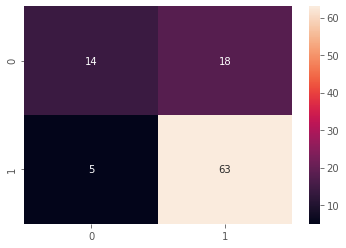

In [67]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True)

print ("Accuracy with XGBoost= ", accuracy_score(y_pred_xgb, y_test))
print("AUC score with XGBoost is: ", roc_auc_score(y_pred_xgb, y_test))
print('F1_score          :',  round(f1_score(y_test,y_pred),4))
print('Precision score   :',  round(precision_score(y_test,y_pred_xgb),4))
print('Recall score      :',  round(recall_score(y_test,y_pred_xgb),4))

Gradient Boosting Algorithm

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier()

In [69]:
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier()

In [70]:
y_pred = gb_classifier.predict(X_test)

Accuracy with GBBoost=  0.8
AUC score with GBBoost is:  0.7040441176470589
F1_score          : 0.8684
Precision score   : 0.7857
Recall score      : 0.9706


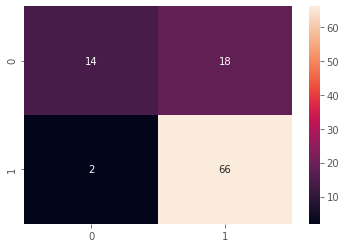

In [71]:
cm_xgb = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_xgb, annot=True)

print ("Accuracy with GBBoost= ", accuracy_score(y_test, y_pred))
print("AUC score with GBBoost is: ", roc_auc_score(y_test, y_pred))
print('F1_score          :',  round(f1_score(y_test,y_pred),4))
print('Precision score   :',  round(precision_score(y_test,y_pred),4))
print('Recall score      :',  round(recall_score(y_test,y_pred),4))

Perforemence of logistic model

In [72]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [73]:
y_pred = logistic_model.predict(X_test) 

In [74]:
print('Accuracy score    :',  round(accuracy_score(y_test,y_pred),4))
print('Precision score   :',  round(precision_score(y_test,y_pred),4))
print('Recall score      :',  round(recall_score(y_test,y_pred),4))
print('Confusion Matrix  :\n',confusion_matrix(y_test,y_pred))
print('F1_score          :',  round(f1_score(y_test,y_pred),4))

Accuracy score    : 0.82
Precision score   : 0.8289
Recall score      : 0.9265
Confusion Matrix  :
 [[19 13]
 [ 5 63]]
F1_score          : 0.875


In [75]:
y_train_pred = logistic_model.predict(X_train) 

In [76]:
print('Accuracy score    :',  round(accuracy_score(y_train,y_train_pred),4))
print('Precision score   :',  round(precision_score(y_train,y_train_pred),4))
print('Recall score      :',  round(recall_score(y_train,y_train_pred),4))
print('Confusion Matrix  :\n',confusion_matrix(y_train,y_train_pred))
print('F1_score          :',  round(f1_score(y_train,y_train_pred),4))

Accuracy score    : 0.985
Precision score   : 0.9859
Recall score      : 0.9929
Confusion Matrix  :
 [[115   4]
 [  2 279]]
F1_score          : 0.9894


Performence of Naive bayes

In [77]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train,y_train)

MultinomialNB()

In [78]:
y_pred = nb_classifier.predict(X_test)

In [79]:
print('Accuracy score    :',  round(accuracy_score(y_test,y_pred),4))
print('Precision score   :',  round(precision_score(y_test,y_pred),4))
print('Recall score      :',  round(recall_score(y_test,y_pred),4))
print('Confusion Matrix  :\n',confusion_matrix(y_test,y_pred))
print('F1_score          :',  round(f1_score(y_test,y_pred),4))

Accuracy score    : 0.8
Precision score   : 0.8158
Recall score      : 0.9118
Confusion Matrix  :
 [[18 14]
 [ 6 62]]
F1_score          : 0.8611
